In [177]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATASET = "Datasets/"

C:\Users\Louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


In [178]:
telco = pd.read_csv(DATASET + "WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [179]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [180]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [181]:
# Why Total Charges is an object and not a float?
telco['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [182]:
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')
telco['TotalCharges'].isnull().sum() 

11

In [183]:
# There are 11 missing values in TotalCharges, we replace them with the median value.
median = telco['TotalCharges'].median()
telco['TotalCharges'] = telco['TotalCharges'].fillna(median)


In [184]:
# Now let's check the other object columns.
for column in telco.select_dtypes(include=['object']).columns:
    print(f"Column: {column}")
    print(telco[column].unique())
    print()

Column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Column: gender
['Female' 'Male']

Column: Partner
['Yes' 'No']

Column: Dependents
['No' 'Yes']

Column: PhoneService
['No' 'Yes']

Column: MultipleLines
['No phone service' 'No' 'Yes']

Column: InternetService
['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity
['No' 'Yes' 'No internet service']

Column: OnlineBackup
['Yes' 'No' 'No internet service']

Column: DeviceProtection
['No' 'Yes' 'No internet service']

Column: TechSupport
['No' 'Yes' 'No internet service']

Column: StreamingTV
['No' 'Yes' 'No internet service']

Column: StreamingMovies
['No' 'Yes' 'No internet service']

Column: Contract
['Month-to-month' 'One year' 'Two year']

Column: PaperlessBilling
['Yes' 'No']

Column: PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Column: Churn
['No' 'Yes']



In [185]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [186]:
telco.isnull().sum()  
# There are no other missing values in the dataset.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [187]:
telco["customerID"].nunique(), telco.shape[0], telco["customerID"].nunique() == telco.shape[0]
# True, there are no duplicates in customerID.

(7043, 7043, True)

In [188]:
# We drop customerID since it is not useful for our analysis.
telco.drop(columns=["customerID"], inplace=True)

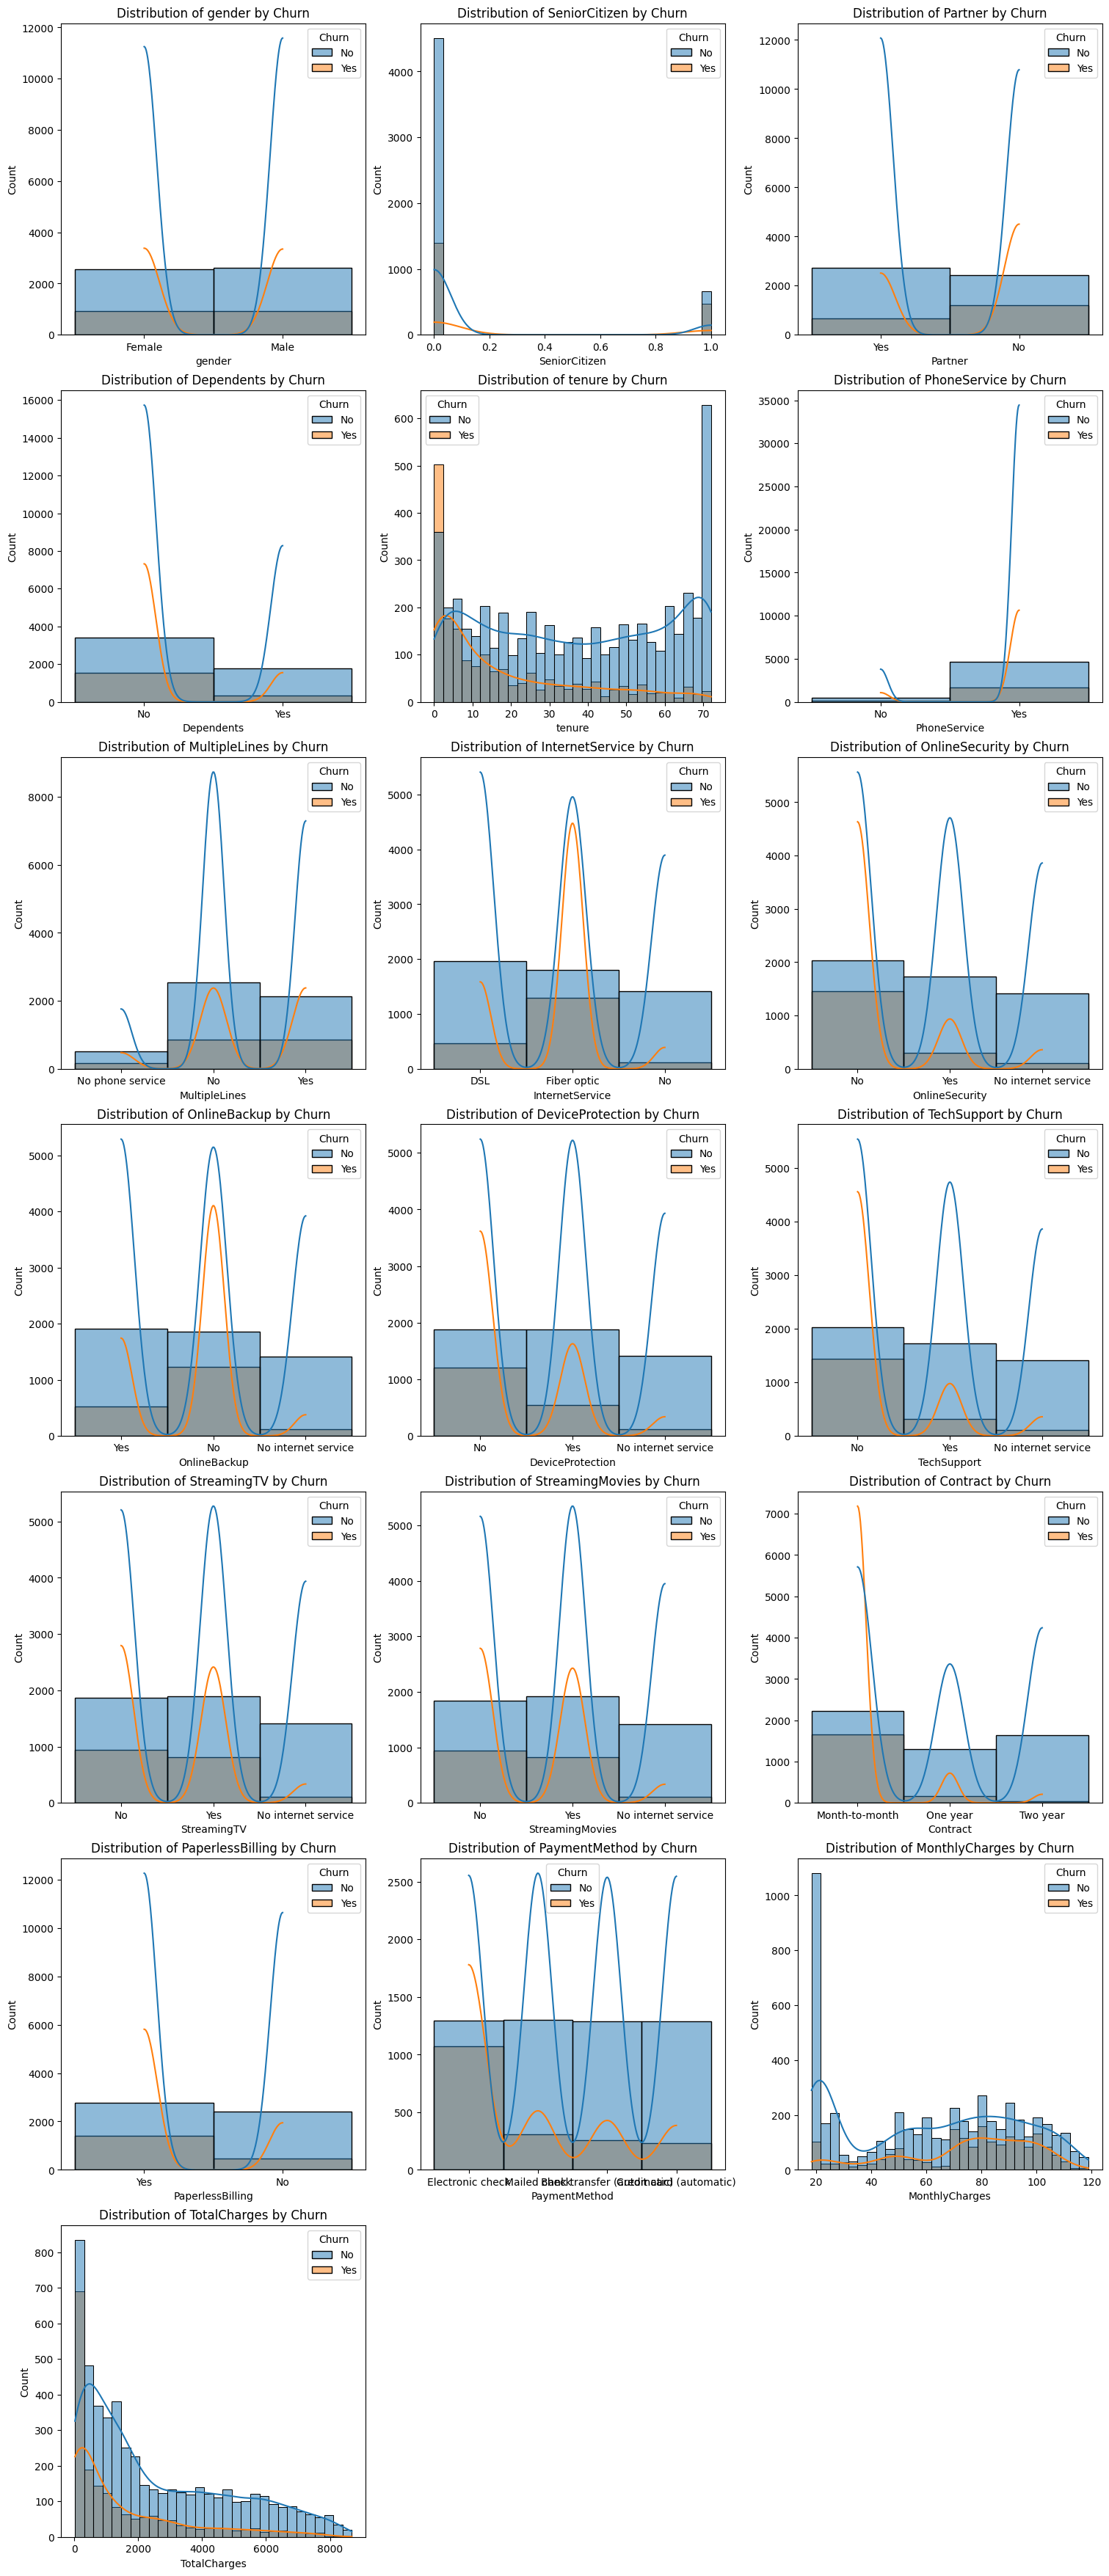

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

features = [feature for feature in telco.select_dtypes(include=['float64', 'int64', 'object', 'int32']).columns if feature != 'Churn']

n_cols = 3
n_rows = math.ceil(len(features) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows), constrained_layout=True)

for ax, feature in zip(axes.flat, features):
    sns.histplot(data=telco, x=feature, hue='Churn', kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribution of {feature} by Churn')

for ax in axes.flat[len(features):]:
    ax.axis('off')
    
plt.show()

In [190]:
# PCA
# First we need to convert the categorical variables to numerical variables.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
non_num_col = telco.select_dtypes(include=['object']).columns.tolist()
for col in non_num_col:
    telco[col] = label_encoder.fit_transform(telco[col])


<Axes: >

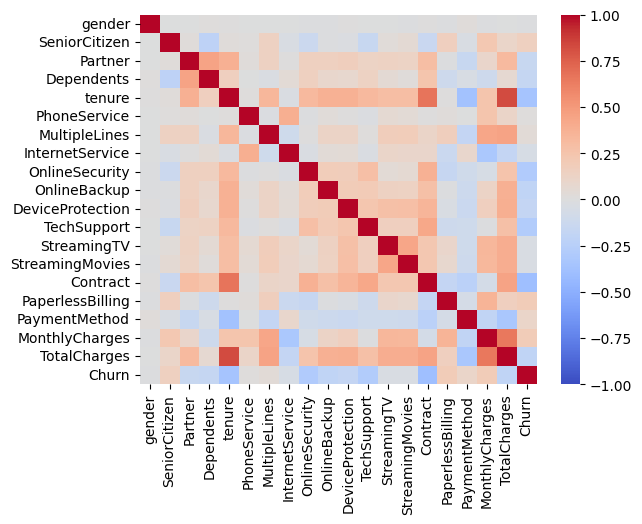

In [191]:
# Now that all variables are numeric, we can display the correlation matrix.
sns.heatmap(telco.corr(numeric_only=True), vmin=-1, vmax=1, cmap='coolwarm')

In [192]:
# We need to scale the data.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
telco_scaled = scaler.fit_transform(telco.drop(columns=['Churn']))

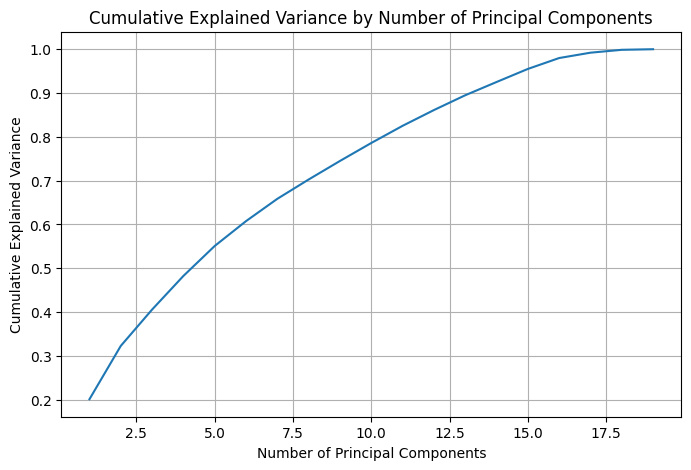

In [193]:
# Now we can apply PCA.
from sklearn.decomposition import PCA

# We need to choose the number of components.
pca = PCA()
pca.fit(telco_scaled)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, linestyle='-')
plt.xlabel('Number of Principal Components') 
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid()
plt.show()

Number of components: 1, Recall: 0.6971 (+/- 0.0369)
Number of components: 2, Recall: 0.7572 (+/- 0.0271)
Number of components: 3, Recall: 0.7719 (+/- 0.0203)
Number of components: 4, Recall: 0.7719 (+/- 0.0205)
Number of components: 5, Recall: 0.7839 (+/- 0.0210)
Number of components: 6, Recall: 0.7766 (+/- 0.0198)
Number of components: 7, Recall: 0.7772 (+/- 0.0209)
Number of components: 8, Recall: 0.7746 (+/- 0.0219)
Number of components: 9, Recall: 0.7793 (+/- 0.0269)
Number of components: 10, Recall: 0.7853 (+/- 0.0216)
Number of components: 11, Recall: 0.7799 (+/- 0.0277)
Number of components: 12, Recall: 0.7893 (+/- 0.0264)
Number of components: 13, Recall: 0.7873 (+/- 0.0265)
Number of components: 14, Recall: 0.8060 (+/- 0.0235)
Number of components: 15, Recall: 0.8074 (+/- 0.0196)
Number of components: 16, Recall: 0.8080 (+/- 0.0271)
Number of components: 17, Recall: 0.8060 (+/- 0.0248)
Number of components: 18, Recall: 0.7993 (+/- 0.0242)
Number of components: 19, Recall: 0.8

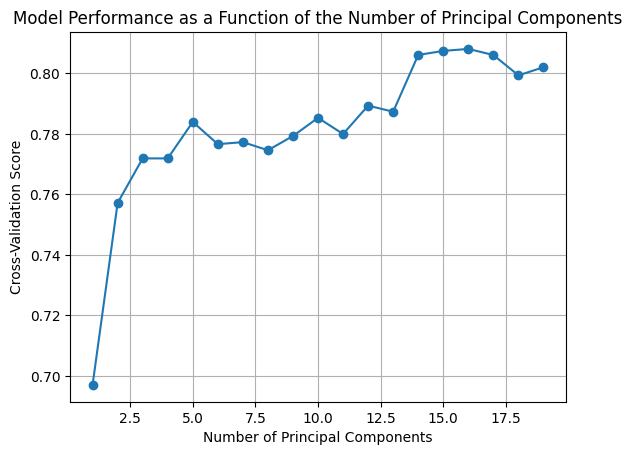

In [194]:
# Other way to choose the number of components by maximizing the recall score. 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(telco_scaled, telco['Churn'], test_size=0.2, random_state=42, stratify=telco['Churn'])
scores = []

for dim in range(1, telco_scaled.shape[1] + 1):
    pca = PCA(n_components=dim)
    X_train_pca = pca.fit_transform(X_train)
    
    model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
    model.fit(X_train_pca, y_train)
    
    score = cross_val_score(model, X_train_pca, y_train, cv=10, scoring='recall').mean()
    deviation = cross_val_score(model, X_train_pca, y_train, cv=10, scoring='recall').std()
    print(f"Number of components: {dim}, Recall: {score:.4f} (+/- {deviation:.4f})")
    scores.append(score)

plt.plot(range(1, len(scores) + 1), scores, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cross-Validation Score')
plt.title('Model Performance as a Function of the Number of Principal Components')
plt.grid()
plt.show()

In [195]:
# We choose the number of components that maximizes the recall score: 14 components
pca = PCA(n_components=14)
telco_pca = pca.fit_transform(telco_scaled)

In [196]:
# Let's now process to a classification task with KMeans.
from sklearn.cluster import KMeans

kmmeans = KMeans(n_clusters=2, random_state=42, n_init=10, max_iter=300)
kmmeans.fit(telco_pca)

KMeans(n_clusters=2, n_init=10, random_state=42)

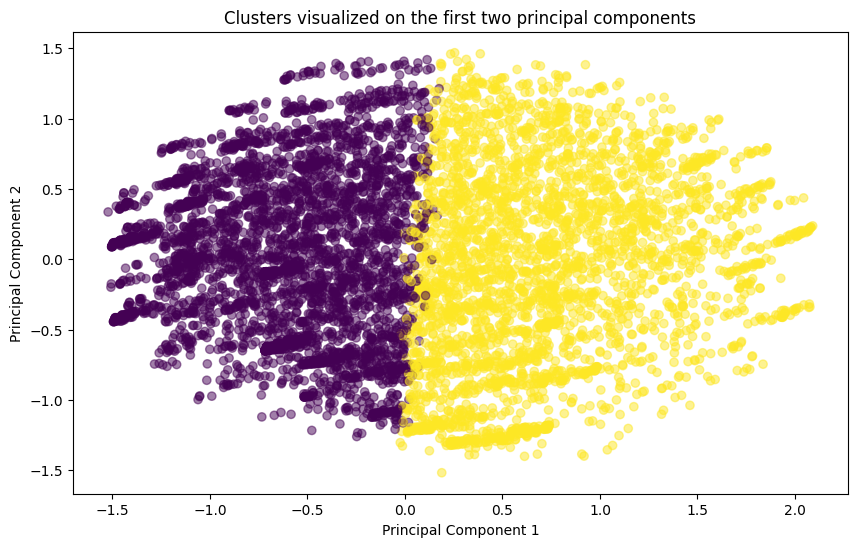

In [197]:
# Let's visualize the clusters.
plt.figure(figsize=(10, 6))
plt.scatter(telco_pca[:, 0], telco_pca[:, 1], c=kmmeans.labels_, cmap='viridis', alpha=0.5)
plt.title("Clusters visualized on the first two principal components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

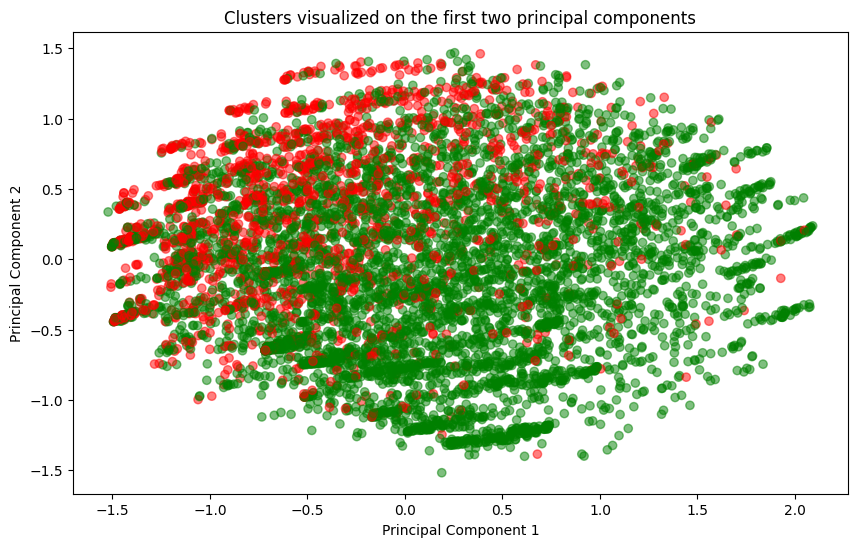

In [198]:
# Compare the clusters with the feature 'Churn'.
colors_ = telco['Churn'].map({0: 'green', 1: 'red'})

plt.figure(figsize=(10, 6))
plt.scatter(telco_pca[:, 0], telco_pca[:, 1], c=colors_, alpha=0.5)
plt.title("Clusters visualized on the first two principal components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

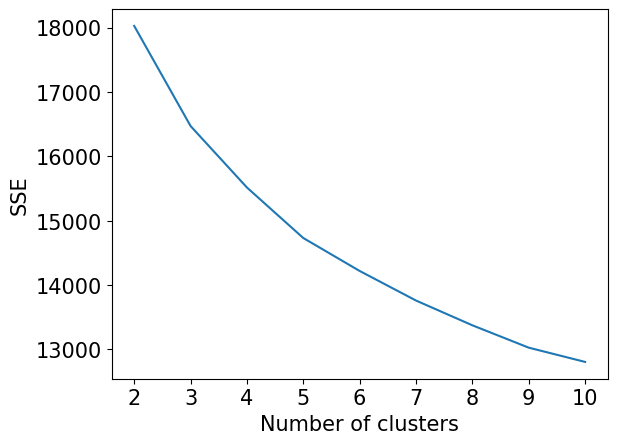

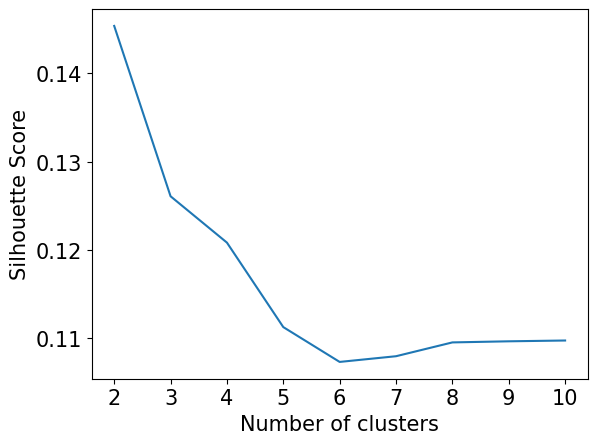

In [199]:
from sklearn.metrics import silhouette_score

sse_list = list()
silhouette_score_list = list()
max_k = 10
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(telco_pca)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

    silhouette_score_value = silhouette_score(telco_pca, kmeans.labels_)
    silhouette_score_list.append(silhouette_score_value)

plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=15)
plt.xlabel('Number of clusters', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xticks([2,3,4,5,6,7,8,9,10])
plt.show()

plt.plot(range(2, len(silhouette_score_list) + 2), silhouette_score_list)
plt.ylabel('Silhouette Score', fontsize=15)
plt.xlabel('Number of clusters', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xticks([2,3,4,5,6,7,8,9,10])
plt.show()


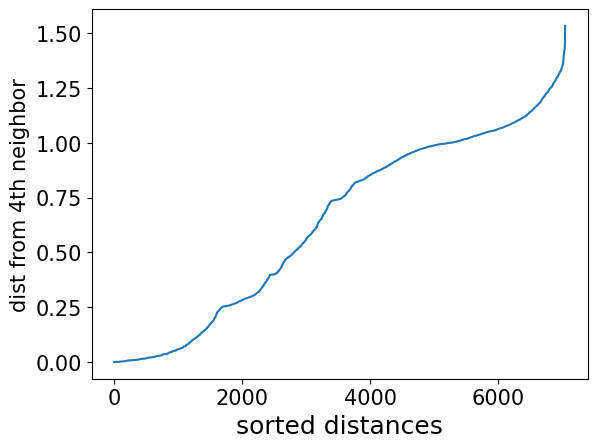

In [200]:
# Now, let's try with DBSCAN.
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform

dist = pdist(telco_pca, 'euclidean') 
dist = squareform(dist)

k = 4
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [201]:
# We decide to choose 1.1 as epsilon.
dbscan = DBSCAN(eps=1.1, min_samples=5, metric='euclidean')
dbscan.fit(telco_pca)

DBSCAN(eps=1.1)

In [202]:
np.unique(dbscan.labels_)

array([-1,  0,  1], dtype=int64)

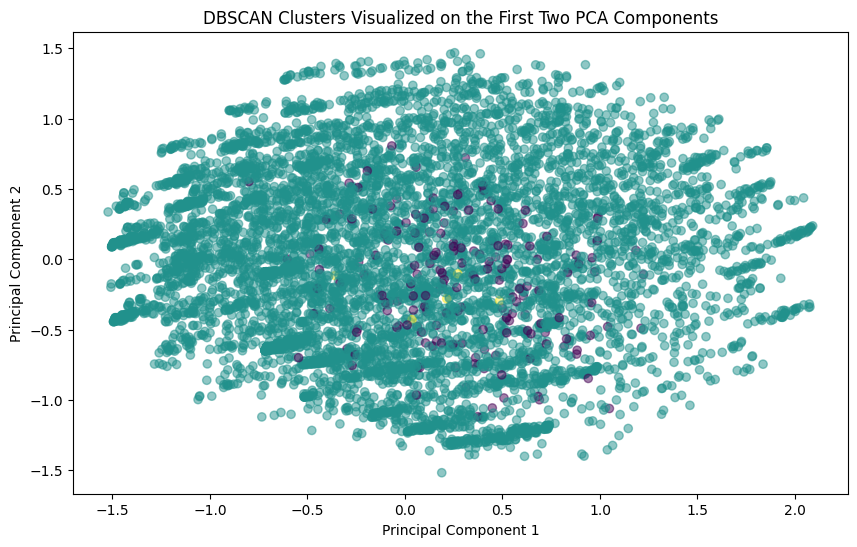

In [203]:
plt.figure(figsize=(10, 6))
plt.scatter(telco_pca[:, 0], telco_pca[:, 1], c=dbscan.labels_, cmap='viridis', alpha=0.5)
plt.title("DBSCAN Clusters Visualized on the First Two PCA Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [204]:
print('Silhouette %s' % silhouette_score(telco_pca, dbscan.labels_))

Silhouette 0.009049381851766904


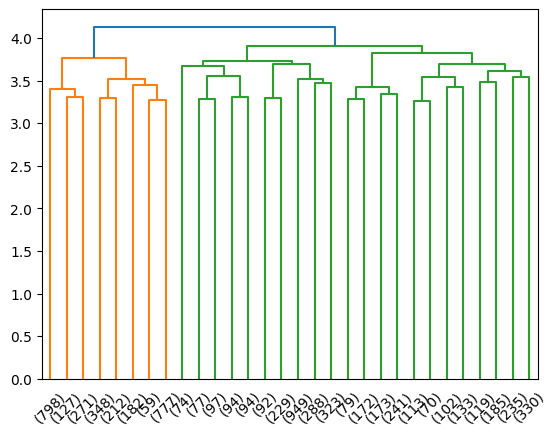

In [205]:
# Now, let's try with hierarchical clustering.
from scipy.stats import mode
from scipy.cluster.hierarchy import linkage, dendrogram

# Complete method
data_dist = pdist(telco_pca, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=4, truncate_mode='lastp')

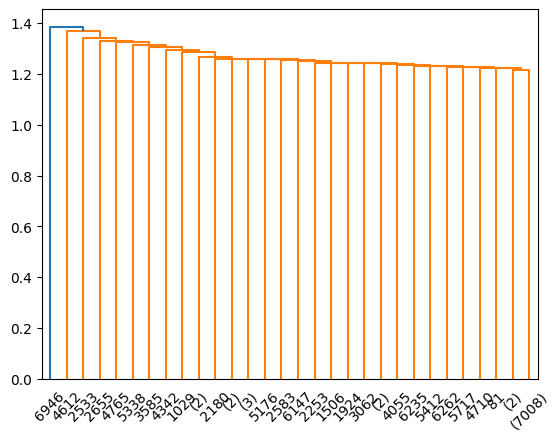

In [206]:
# Single method
data_dist = pdist(telco_pca, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.38, truncate_mode='lastp')

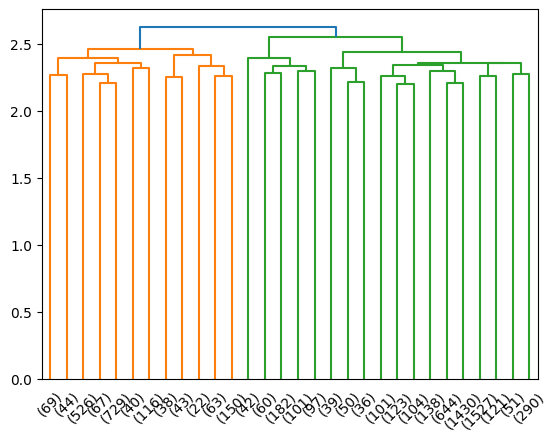

In [207]:
# Average method
data_dist = pdist(telco_pca, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=2.6, truncate_mode='lastp')

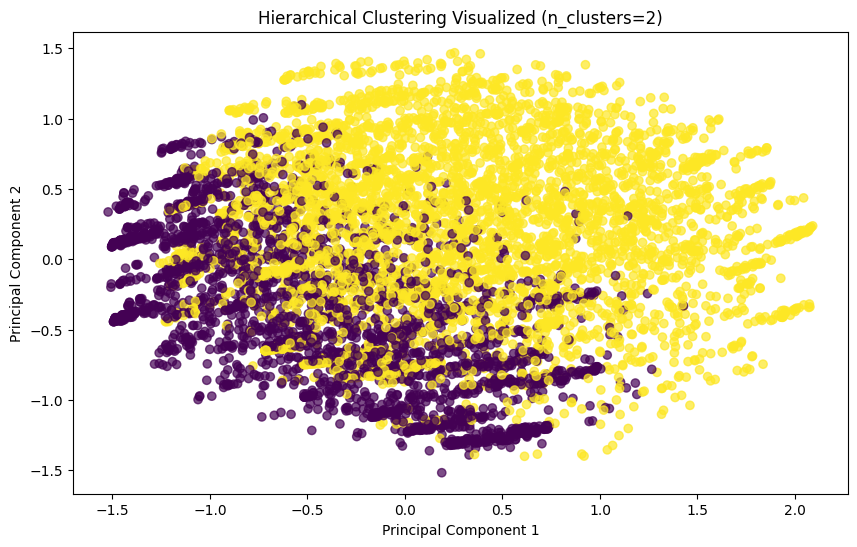

In [208]:
from scipy.cluster.hierarchy import fcluster

n_clusters = 2
linked = linkage(telco_pca, method='complete')
hierarchical_labels = fcluster(linked, n_clusters, criterion='maxclust')

plt.figure(figsize=(10, 6))
plt.scatter(telco_pca[:, 0], telco_pca[:, 1], c=hierarchical_labels, cmap='viridis', alpha=0.7)
plt.title(f"Hierarchical Clustering Visualized (n_clusters={n_clusters})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [209]:
print('Silhouette %s' % silhouette_score(telco_pca, hierarchical_labels))

Silhouette 0.06376176224462358


In [210]:
# Until now, we will classify the data.
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = pd.DataFrame(telco_pca)
y = telco['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [211]:
# First we will try with a logistic regression.
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1035
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.74      1409

[[724 311]
 [ 73 301]]


In [212]:
# Now we will use a decision tree.
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth=None)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1035
           1       0.47      0.48      0.48       374

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409

[[829 206]
 [193 181]]


In [213]:
# The decision tree is not as good as the logistic regression, but we can improve this result with a random forest.
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1035
           1       0.59      0.42      0.49       374

    accuracy                           0.77      1409
   macro avg       0.70      0.66      0.67      1409
weighted avg       0.75      0.77      0.76      1409

[[928 107]
 [218 156]]


In [214]:
# Let's try with AdaBoost.
from sklearn.ensemble import AdaBoostClassifier

stump = DecisionTreeClassifier(random_state=42, max_depth=1)
adaboost = AdaBoostClassifier(estimator=stump, n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1035
           1       0.56      0.46      0.51       374

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.75      1409

[[902 133]
 [202 172]]


In [215]:
# We can use a support vector machine.
from sklearn.svm import SVC

svm = SVC(class_weight='balanced', random_state=42, kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1035
           1       0.48      0.82      0.61       374

    accuracy                           0.71      1409
   macro avg       0.70      0.75      0.69      1409
weighted avg       0.80      0.71      0.73      1409

[[699 336]
 [ 66 308]]


In [216]:
# Let's try with XGBoost.
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

rs_param_grid = {
    # max_depth: values from 3 to 12
    'max_depth': list((range(3,12))),
    # alpha: values 0, .001, .01, .1
    'alpha': [0,0.001, 0.01,0.1,1],
    # subsample: values 0.25,0.5,0.75, 1
    'subsample': [0.5,0.75,1],
    # learning rate: ten values between 0.01 - 0.5
    'learning_rate': np.linspace(0.01,0.5, 10),
    # n_estimators: values 10, 25, 40
    'n_estimators': [10, 25, 40]
    }

xgb = XGBClassifier(random_state=42)
xgb_rs = RandomizedSearchCV(estimator=xgb,param_distributions=rs_param_grid, 
                                cv=3, n_iter=5, verbose=2, random_state=42)
xgb_rs.fit(X_train, y_train)
y_pred = xgb_rs.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END alpha=0.1, learning_rate=0.5, max_depth=4, n_estimators=40, subsample=0.5; total time=   0.1s
[CV] END alpha=0.1, learning_rate=0.5, max_depth=4, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END alpha=0.1, learning_rate=0.5, max_depth=4, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END alpha=1, learning_rate=0.17333333333333334, max_depth=5, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END alpha=1, learning_rate=0.17333333333333334, max_depth=5, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END alpha=1, learning_rate=0.17333333333333334, max_depth=5, n_estimators=40, subsample=0.5; total time=   0.0s
[CV] END alpha=0.001, learning_rate=0.01, max_depth=8, n_estimators=25, subsample=1; total time=   0.1s
[CV] END alpha=0.001, learning_rate=0.01, max_depth=8, n_estimators=25, subsample=1; total time=   0.2s
[CV] END alpha=0.001, learning_rate=0.01, max_depth=8, n_estimators=25, 

In [217]:
# And with a neural network ?
from sklearn.neural_network import MLPClassifier 

mlp = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100, 50), activation='relu')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1035
           1       0.52      0.49      0.51       374

    accuracy                           0.75      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.75      0.74      1409

[[868 167]
 [190 184]]


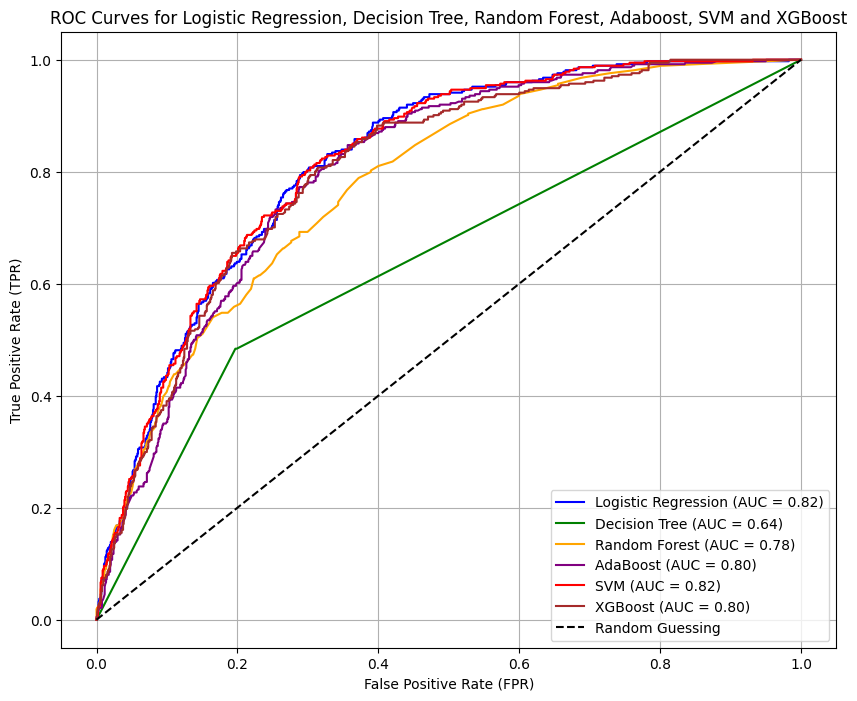

In [218]:
# Now let's plot the ROC curve to compare the models.
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression
y_proba_log = log_reg.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
roc_auc_log = roc_auc_score(y_test, y_proba_log)

# Decision Tree
y_proba_tree = tree.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)
roc_auc_tree = roc_auc_score(y_test, y_proba_tree)

# Random Forest
y_proba_forest = forest.predict_proba(X_test)[:, 1]
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_proba_forest)
roc_auc_forest = roc_auc_score(y_test, y_proba_forest)

# AdaBoost
y_proba_adaboost = adaboost.predict_proba(X_test)[:, 1]
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_proba_adaboost)
roc_auc_adaboost = roc_auc_score(y_test, y_proba_adaboost)

# SVM
y_proba_svm = svm.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)

# XGBoost
y_proba_xgb = xgb_rs.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

# MLP
# y_proba_mlp = mlp.predict_proba(X_test)[:, 1]
# fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_proba_mlp)
# roc_auc_mlp = roc_auc_score(y_test, y_proba_mlp)

plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})", color='blue')
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {roc_auc_tree:.2f})", color='green')
plt.plot(fpr_forest, tpr_forest, label=f"Random Forest (AUC = {roc_auc_forest:.2f})", color='orange')
plt.plot(fpr_adaboost, tpr_adaboost, label=f"AdaBoost (AUC = {roc_auc_adaboost:.2f})", color='purple')
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})", color='red')
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})", color='brown')
# plt.plot(fpr_mlp, tpr_mlp, label=f"MLP (AUC = {roc_auc_mlp:.2f})", color='pink')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curves for Logistic Regression, Decision Tree, Random Forest, Adaboost, SVM and XGBoost")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [219]:
# List of continuous features
continuous_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Creating buckets
for feature in continuous_features:
    telco[f'{feature}_bucket'] = pd.qcut(telco[feature], q=4, labels=[1, 2, 3, 4])

# Displaying the first rows to verify
telco[[f'{feature}_bucket' for feature in continuous_features]].head()

# Dropping the original continuous features
telco.drop(columns=continuous_features, inplace=True)

# At this point, we can reuse the same classification algorithms by rerunning the code from the previous section.
# Conclusion: Using buckets does not lead to a significant improvement in the classification task.

In [220]:
# Pattern Mining
# First, we need to convert the dataset into a transactional format where each row represents a transaction and each column represents an item.
from mlxtend.preprocessing import TransactionEncoder

transactions = telco.astype(str).apply(lambda row: [f"{col}={val}" for col, val in row.items()], axis=1).tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
print(df.columns)

Index(['Churn=0', 'Churn=1', 'Contract=0', 'Contract=1', 'Contract=2',
       'Dependents=0', 'Dependents=1', 'DeviceProtection=0',
       'DeviceProtection=1', 'DeviceProtection=2', 'InternetService=0',
       'InternetService=1', 'InternetService=2', 'MonthlyCharges_bucket=1',
       'MonthlyCharges_bucket=2', 'MonthlyCharges_bucket=3',
       'MonthlyCharges_bucket=4', 'MultipleLines=0', 'MultipleLines=1',
       'MultipleLines=2', 'OnlineBackup=0', 'OnlineBackup=1', 'OnlineBackup=2',
       'OnlineSecurity=0', 'OnlineSecurity=1', 'OnlineSecurity=2',
       'PaperlessBilling=0', 'PaperlessBilling=1', 'Partner=0', 'Partner=1',
       'PaymentMethod=0', 'PaymentMethod=1', 'PaymentMethod=2',
       'PaymentMethod=3', 'PhoneService=0', 'PhoneService=1',
       'SeniorCitizen=0', 'SeniorCitizen=1', 'StreamingMovies=0',
       'StreamingMovies=1', 'StreamingMovies=2', 'StreamingTV=0',
       'StreamingTV=1', 'StreamingTV=2', 'TechSupport=0', 'TechSupport=1',
       'TechSupport=2', 'Total

In [221]:
# Now we can apply the Apriori algorithm to find frequent itemsets.
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.15, use_colnames=True)
print(frequent_itemsets.head())
print(frequent_itemsets.shape)

    support      itemsets
0  0.734630     (Churn=0)
1  0.265370     (Churn=1)
2  0.550192  (Contract=0)
3  0.209144  (Contract=1)
4  0.240664  (Contract=2)
(6879, 2)


In [222]:
# Let's generate association rules from the frequent itemsets.
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Churn must be in the consequent
rules = rules[rules['consequents'].apply(lambda x: any('Churn=' in item for item in x))]
print(rules.head())
print(rules.shape)

      antecedents consequents  antecedent support  consequent support  \
0    (Contract=0)   (Churn=0)            0.550192             0.73463   
1    (Contract=1)   (Churn=0)            0.209144             0.73463   
2    (Contract=2)   (Churn=0)            0.240664             0.73463   
4  (Dependents=0)   (Churn=0)            0.700412             0.73463   
5  (Dependents=1)   (Churn=0)            0.299588             0.73463   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.315207    0.572903  0.779853               1.0 -0.088981    0.621334   
1  0.185574    0.887305  1.207825               1.0  0.031931    2.354758   
2  0.233849    0.971681  1.322681               1.0  0.057050    9.370874   
4  0.481329    0.687209  0.935448               1.0 -0.033215    0.848392   
5  0.253301    0.845498  1.150916               1.0  0.033215    1.717578   

   zhangs_metric   jaccard  certainty  kulczynski  
0      -0.385593  0.325084  -0.609440    0.500

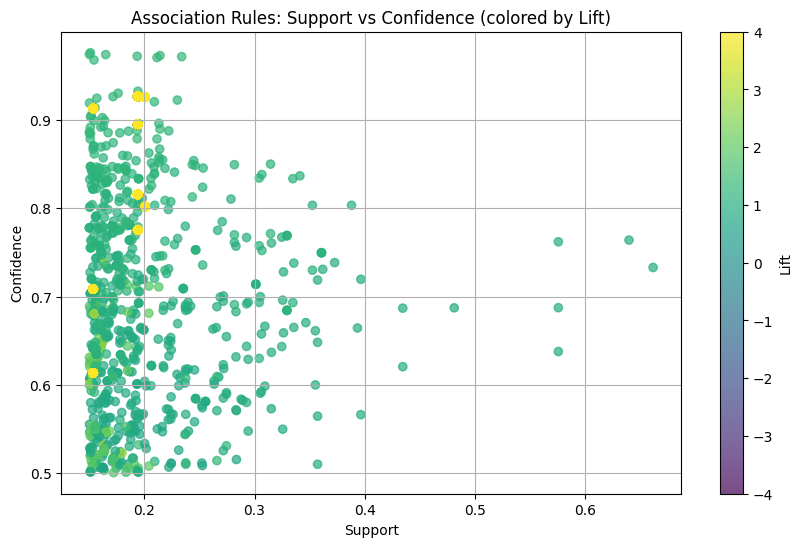

In [223]:
# Let's visualize the rules using a scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', alpha=0.7, vmin=-4, vmax=4)
plt.colorbar(label='Lift')
plt.title("Association Rules: Support vs Confidence (colored by Lift)")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.grid()
plt.show()

In [224]:
# Now, we select the top best rules based on lift, confidence, and support.
selected_rules = rules[(rules['confidence'] > 0.8) & (rules['support'] > 0.1) & (rules['lift'] > 3)]
selected_rules = selected_rules.drop_duplicates(subset=['support', 'confidence', 'lift'])  # Drop duplicates
print(selected_rules)

                                     antecedents  \
709                          (InternetService=2)   
714                         (DeviceProtection=1)   
715                    (MonthlyCharges_bucket=1)   
5280        (InternetService=2, MultipleLines=0)   
5328        (InternetService=2, SeniorCitizen=0)   
5331                         (InternetService=2)   
5378       (DeviceProtection=1, MultipleLines=0)   
5426       (DeviceProtection=1, SeniorCitizen=0)   
5428  (MonthlyCharges_bucket=1, SeniorCitizen=0)   
5429                        (DeviceProtection=1)   

                                            consequents  antecedent support  \
709                       (DeviceProtection=1, Churn=0)            0.216669   
714                  (MonthlyCharges_bucket=1, Churn=0)            0.216669   
715                       (DeviceProtection=1, Churn=0)            0.250177   
5280                      (DeviceProtection=1, Churn=0)            0.168110   
5328                      (Devic

In [227]:
# Display the selected rules in a table format.
tableau = selected_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].copy()
tableau.columns = ['Antécédent', 'Conséquent', 'Support', 'Confiance', 'Lift']
display(tableau)

,Antécédent,Conséquent,Support,Confiance,Lift
709,(InternetService=2),"(DeviceProtection=1, Churn=0)",0.200625,0.925950,4.615334
714,(DeviceProtection=1),"(MonthlyCharges_bucket=1, Churn=0)",0.200625,0.925950,4.169736
715,(MonthlyCharges_bucket=1),"(DeviceProtection=1, Churn=0)",0.200625,0.801930,3.997162
5280,"(InternetService=2, MultipleLines=0)","(DeviceProtection=1, Churn=0)",0.153486,0.913007,4.550819
5328,"(InternetService=2, SeniorCitizen=0)","(DeviceProtection=1, Churn=0)",0.193951,0.926730,4.619221
5331,(InternetService=2),"(DeviceProtection=1, Churn=0, SeniorCitizen=0)",0.193951,0.895151,4.615334
5378,"(DeviceProtection=1, MultipleLines=0)","(MonthlyCharges_bucket=1, Churn=0)",0.153486,0.913007,4.111449
5426,"(DeviceProtection=1, SeniorCitizen=0)","(MonthlyCharges_bucket=1, Churn=0)",0.193951,0.926730,4.173248
5428,"(MonthlyCharges_bucket=1, SeniorCitizen=0)","(DeviceProtection=1, Churn=0)",0.193951,0.815522,4.064914
5429,(DeviceProtection=1),"(MonthlyCharges_bucket=1, Churn=0, SeniorCitiz...",0.193951,0.895151,4.200231


In [ ]:
# Based on these somewhat redundant rules, we can conclude that among fiber optic customers (InternetService = 2),
# those who have Device Protection are significantly less likely to churn.
# Therefore, offering Device Protection to other fiber optic customers could potentially help reduce churn in this segment.